In [8]:
%run functions/cytoscapeFunctions
%run functions/edgeFunctions
%run functions/springLayoutJN1

In [9]:
networkFolder = os.path.join(os.path.dirname(os.path.abspath("template.cys")), 'networks')

GMP = os.path.join(networkFolder, 'GMP')
Prog = os.path.join(networkFolder, 'Progenitor')

GMPedge = os.path.join(GMP, 'edge.tsv')
GMPnode = os.path.join(GMP, 'node.tsv')

ProgEdge = os.path.join(Prog, 'edge.tsv')
ProgNode = os.path.join(Prog, 'node.tsv')

gmpEdgeDF = pd.read_csv(GMPedge, delimiter = '\t')
gmpNodeDF = pd.read_csv(GMPnode, delimiter = '\t')
progEdgeDF = pd.read_csv(ProgEdge, delimiter = '\t')
progNodeDF = pd.read_csv(ProgNode, delimiter = '\t')

gmpNetwork = nx.Graph()
gmpOverlap = 0

for i in range (len(gmpEdgeDF)):
    if gmpNetwork.has_edge(gmpEdgeDF['Regulator'][i], gmpEdgeDF['Target'][i]):
        gmpOverlap += 1
    gmpNetwork.add_edge(gmpEdgeDF['Regulator'][i], gmpEdgeDF['Target'][i])
    
progNetwork = nx.Graph()

progOverlap = 0

for i in range (len(progEdgeDF)):
    if progNetwork.has_edge(progEdgeDF['Regulator'][i], progEdgeDF['Target'][i]):
        progOverlap += 1
    progNetwork.add_edge(progEdgeDF['Regulator'][i], progEdgeDF['Target'][i])

print(gmpOverlap, progOverlap)    

gmpNodeIndexDF = gmpNodeDF.set_index('Name')
progNodeIndexDF = progNodeDF.set_index('Name')

nx.set_node_attributes(gmpNetwork, gmpNodeDF.to_dict('index'))
nx.set_node_attributes(gmpNetwork, gmpNodeIndexDF.to_dict('index'))

gmpNetwork1 = gmpNetwork.copy()
# gmpNetwork1.remove_node('IRF7')

nx.set_node_attributes(progNetwork, progNodeDF.to_dict('index'))
nx.set_node_attributes(progNetwork, progNodeIndexDF.to_dict('index'))

32 10


In [47]:
layout = fruchterman_reingold_layout_edit(gmpNetwork, seed = 1, iterations = 1000, pretendIterations = 50, stop = 1000)

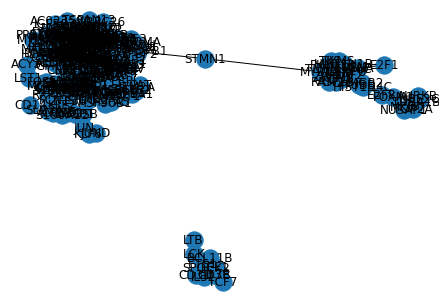

In [48]:
nx.draw(gmpNetwork, pos = layout, with_labels = True)

In [12]:
pd.DataFrame(layout).transpose()

,0,1
BCL11A,-0.089534,-0.099164
CSTA,-0.012588,-0.135297
IL3RA,-0.044384,-0.175772
IRF7,-0.106275,0.057861
LYZ,0.055232,-0.161080
...,...,...
MYLK,-0.271588,-0.445595
TCF7,0.564934,-0.333404
XBP1,-0.030143,0.100269
HSP90B1,0.387472,-0.084532


In [13]:
list(layout.values())[0][0]

-0.08953417515061583

In [14]:
sampDict= {}

In [15]:
sampDict['data'] = {'id':'BCA', 'label':'BCA'}

In [16]:
sampDict['position'] = {'x':10, 'y':20}

In [17]:
sampDict

{'data': {'id': 'BCA', 'label': 'BCA'}, 'position': {'x': 10, 'y': 20}}

In [18]:
len(layout)

248

In [78]:
convertNode(gmpNetwork)

,Type
BCL11A,TF
CSTA,normal
IL3RA,normal
IRF7,TF
LYZ,normal
...,...
MYLK,normal
TCF7,TF
XBP1,TF
HSP90B1,normal


In [92]:
rawNodes = gmpNetwork.nodes(data = True)

In [121]:
list(list(rawNodes)[0][1].values())

['TF']

In [135]:
def formatPos(nodes, layout, multiplier):
    names = list(layout.keys())
    coords = list(layout.values())
    nodeData = list(nodes)
    elements = []
    
    for element in range(len(layout)):
        classes = ''
        for attrib in range (len(nodeData[0])-1):
            classes = classes + ' ' + list(nodeData[element][attrib+1].values())[0]
        
        elements.append({'data':{'id':names[element], 'label': names[element]}, 'position': {'x':coords[element][0]*multiplier, 'y':coords[element][1]*multiplier}, 'classes': classes})
        
        
    
    return elements

In [137]:
elements = formatPos(rawNodes, layout, 1000)

In [138]:
elements

[{'data': {'id': 'BCL11A', 'label': 'BCL11A'},
  'position': {'x': -153.62494320979147, 'y': 79.48817716371099},
  'classes': ' TF'},
 {'data': {'id': 'CSTA', 'label': 'CSTA'},
  'position': {'x': -125.23049986759396, 'y': 46.667051355583745},
  'classes': ' normal'},
 {'data': {'id': 'IL3RA', 'label': 'IL3RA'},
  'position': {'x': -144.21624841703982, 'y': 110.56881865397698},
  'classes': ' normal'},
 {'data': {'id': 'IRF7', 'label': 'IRF7'},
  'position': {'x': -102.99486234395819, 'y': 130.88763779385297},
  'classes': ' TF'},
 {'data': {'id': 'LYZ', 'label': 'LYZ'},
  'position': {'x': -138.7889493726274, 'y': 7.92001635403009},
  'classes': ' normal'},
 {'data': {'id': 'MZB1', 'label': 'MZB1'},
  'position': {'x': -142.09286974557415, 'y': 89.26655703861431},
  'classes': ' normal'},
 {'data': {'id': 'RNASE2', 'label': 'RNASE2'},
  'position': {'x': -129.90477968739035, 'y': 82.93486615608182},
  'classes': ' normal'},
 {'data': {'id': 'SPIB', 'label': 'SPIB'},
  'position': {'x'

In [62]:
edges = list(gmpNetwork.edges(data = True))

In [69]:
def formatEdge(edges):
    edgeList = []
    
    for edge in range (len(edges)):
        edgeList.append({'data':{'source':edges[edge][0], 'target':edges[edge][1], 'label': edges[edge][0] + ' to ' + edges[edge][1]}})
    
    return edgeList

In [71]:
formattedEdge = formatEdge(edges)

In [72]:
edges + formattedEdge

[('BCL11A', 'CSTA', {}),
 ('BCL11A', 'IL3RA', {}),
 ('BCL11A', 'IRF7', {}),
 ('BCL11A', 'LYZ', {}),
 ('BCL11A', 'MZB1', {}),
 ('BCL11A', 'RNASE2', {}),
 ('BCL11A', 'SPIB', {}),
 ('BCL11A', 'TCF4', {}),
 ('CSTA', 'CEBPD', {}),
 ('CSTA', 'FOS', {}),
 ('CSTA', 'IRF7', {}),
 ('CSTA', 'IRF8', {}),
 ('CSTA', 'SOX4', {}),
 ('CSTA', 'SPIB', {}),
 ('CSTA', 'TCF4', {}),
 ('IL3RA', 'IRF7', {}),
 ('IL3RA', 'IRF8', {}),
 ('IL3RA', 'SOX4', {}),
 ('IL3RA', 'SPIB', {}),
 ('IL3RA', 'TCF4', {}),
 ('IRF7', 'AC023590.1', {}),
 ('IRF7', 'ADA', {}),
 ('IRF7', 'AIF1', {}),
 ('IRF7', 'ALOX5AP', {}),
 ('IRF7', 'ANXA1', {}),
 ('IRF7', 'APLP2', {}),
 ('IRF7', 'APP', {}),
 ('IRF7', 'ARL4C', {}),
 ('IRF7', 'AZU1', {}),
 ('IRF7', 'B2M', {}),
 ('IRF7', 'BLNK', {}),
 ('IRF7', 'C12orf75', {}),
 ('IRF7', 'CARD11', {}),
 ('IRF7', 'CCDC50', {}),
 ('IRF7', 'CD2AP', {}),
 ('IRF7', 'CD74', {}),
 ('IRF7', 'CDKN2D', {}),
 ('IRF7', 'CFD', {}),
 ('IRF7', 'CIB2', {}),
 ('IRF7', 'CLEC4C', {}),
 ('IRF7', 'CLIC3', {}),
 ('IRF7', 'C